# PLOTS
## CIS 3203N GROUP 3  

**Thesis Partner 1:** Dejito, Christine Ann  
**Thesis Partner 2:** Roca, Zophia Maureen  
**Date:** February 10, 2025  

---

## Instructions
- Use the same font and font size for all graphs.
- Collate the separate graphs into **one single image** for printing.
- Ensure the collated image is **clearly visible** when pasted on a long bond paper.

---

## Deadline
- **Monday, February 10, 2025, at 2:00 PM.**

---

## Deliverables
1. Python code.
2. `.png` files of each graph.
3. `.png` file of the collated graphs.
4. A sample of the collated file pasted into a document, saved as a `.pdf` file.
5. Push everything to your GitHub account.

---

## Code Implementation

### (a) Bar Graph
- Create a horizontal stacked bar chart.
- Transform `1` into **"Yes"** and `0` into **"No"**.
- Follow the plot specifications for the bar plot.

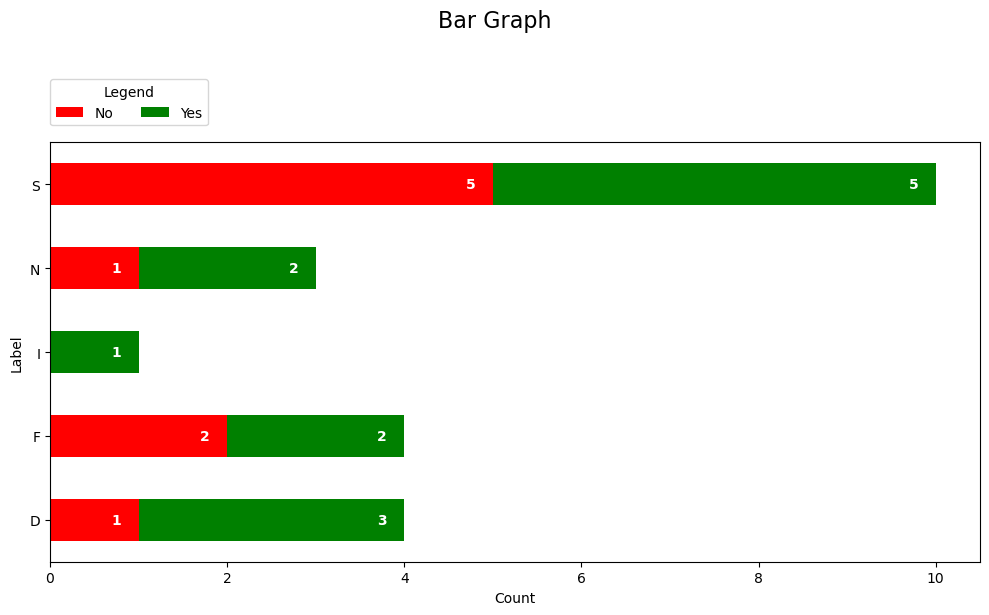

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image

file_path = os.path.join(os.getcwd(), "./data/bar_assignment.csv")
df = pd.read_csv(file_path)

expected_columns = ['LABEL', 'COUNT']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"CSV file must contain the columns: {expected_columns}")

df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

grouped = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

ax = grouped.plot(kind='barh', stacked=True, color=['red', 'green'], figsize=(10, 6))

for i, (label, counts) in enumerate(grouped.iterrows()):
    yes_count = counts['Yes']
    no_count = counts['No']
    
    if no_count > 0:
        ax.text(no_count - 0.2, i, f'{no_count}', va='center', ha='right', color='white', fontweight='bold')
    
    if yes_count > 0:
        ax.text(yes_count + no_count - 0.2, i, f'{yes_count}', va='center', ha='right', color='white', fontweight='bold')

plt.suptitle("Bar Graph", fontsize=16, ha='center', va='bottom')
plt.xlabel("Count")
plt.ylabel("Label")
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(0, 1.15), borderaxespad=0., ncol=2)
plt.tight_layout()

# plt.savefig('./images/bar_graph.png')

plt.show()

### (b) Sankey Diagram
- Create a Sankey Diagram that connects ('PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS') to the LABELS to ('Reg', 'Aca', 'Oth')
- Follow the Path Specifications

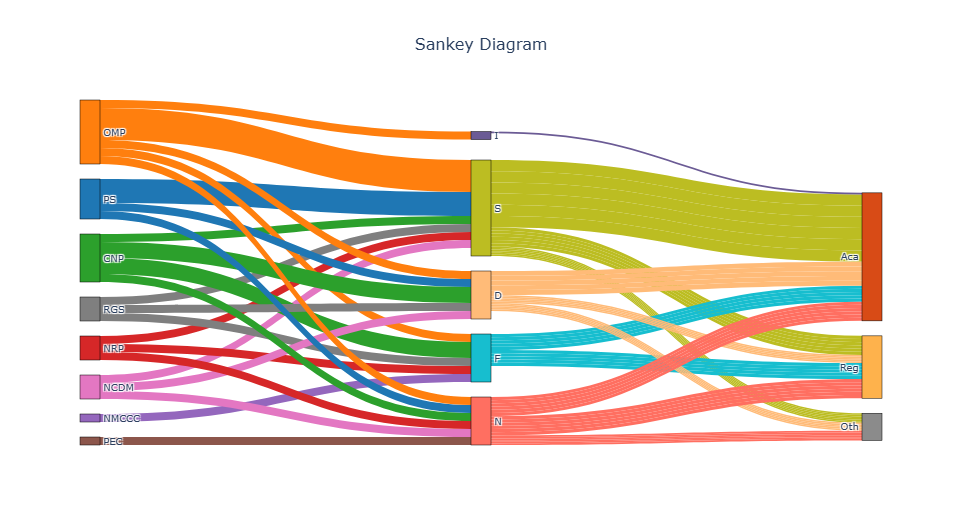

In [10]:
import os
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image

file_path = os.path.join(os.getcwd(), "./data/sankey_assignment.csv")
df = pd.read_csv(file_path)

source_labels = ["PS", "OMP", "CNP", "NRP", "NMCCC", "PEC", "NCDM", "RGS"]
intermediate_labels = ["S", "F", "D", "N", "I"]
target_labels = ["Reg", "Aca", "Oth"]
all_labels = source_labels + intermediate_labels + target_labels

color_palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", 
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#ffbb78", "#ff6f61", 
    "#6b5b95", "#feb24c", "#d84b16", "#8b8b8b", "#5f9ea0", "#f1c40f", 
    "#e74c3c", "#3498db", "#9b59b6", "#2ecc71", "#f39c12", "#16a085"
]

data_values = []
sources = []
targets = []

for i, row in df.iterrows():
    intermediate_label = row['LABEL']
    
    if intermediate_label in intermediate_labels:
        intermediate_index = all_labels.index(intermediate_label)
        
        for label in source_labels:
            if row[label] > 0:
                source_index = all_labels.index(label)
                
                sources.append(source_index)
                targets.append(intermediate_index)
                data_values.append(row[label])

                for target_label in target_labels:
                    if row[target_label] > 0:
                        target_index = all_labels.index(target_label)
                        sources.append(intermediate_index)
                        targets.append(target_index)
                        data_values.append(row[target_label] * 0.2)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20, 
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=color_palette,
    ),
    link=dict(
        source=sources, 
        target=targets,
        value=data_values,
        color=[color_palette[s] for s in sources], 
    )
)])

fig.update_layout(
    title_text="Sankey Diagram", 
    title_font=dict(size=16), 
    title_x=0.5, 
    font_size=10
)

# plt.savefig('./images/sankey_diagram.png')

Image("./images/sankey_diagram.png")

# fig.show()

### (b) Network Graph
- Create the network graph
- D,F,I,N,S should created as a pentagram located at the center of the graph showing connection with each other.
- The others should be outside of the the pentagram, still showing connections to other nodes.
- The node color should be: 
    - Blue: [D,F,I,N,S], 
    - Green: ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA’], 
    - Yellow: ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']


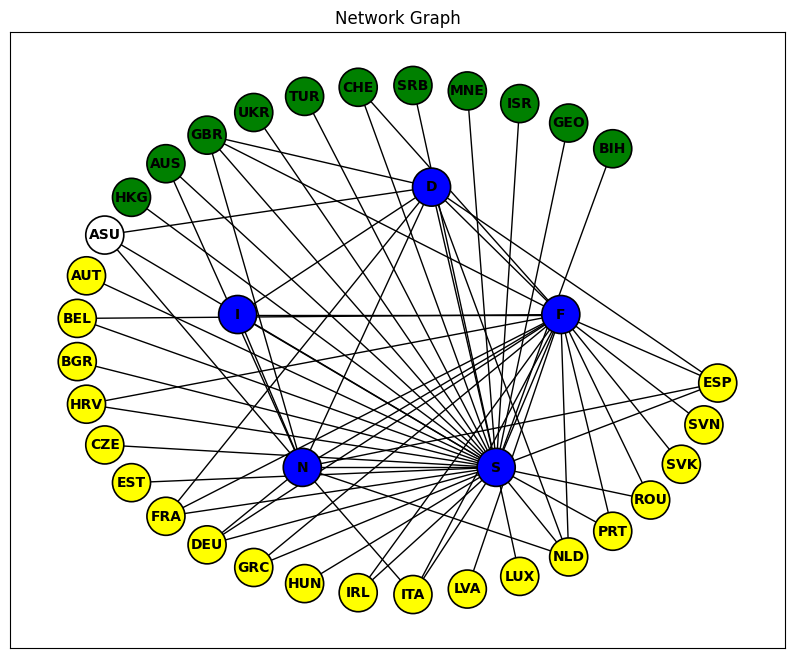

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

network_data = pd.read_csv('./data/networks_assignment.csv')

adjacency_dict = {
    row['LABELS']: {col: row[col] for col in network_data.columns if col != 'LABELS'}
    for _, row in network_data.iterrows()
}

def extract_edges(start_nodes, end_nodes):
    return [(s, e) for s in start_nodes for e in end_nodes if adjacency_dict[s].get(e, 0) > 0]

core_nodes = ['D', 'F', 'I', 'N', 'S']
peripheral_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']
middle_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA',
                'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

all_nodes = core_nodes + peripheral_nodes + middle_nodes

edges = extract_edges(core_nodes, core_nodes) + extract_edges(core_nodes, peripheral_nodes) + extract_edges(core_nodes, middle_nodes)

graph = nx.Graph()
graph.add_nodes_from(all_nodes)
graph.add_edges_from(edges)

positions = nx.circular_layout(graph)
core_positions = {
    'D': np.array([0.1, 0.6]) ,
    'F': np.array([0.5, 0.1]) ,
    'I': np.array([-0.5, 0.1]) ,
    'N': np.array([-0.3, -0.5]) ,
    'S': np.array([0.3, -0.5]) 
}

positions.update(core_positions)

color_map = {
    tuple(core_nodes): 'blue',  
    tuple(peripheral_nodes): 'green', 
    tuple(middle_nodes): 'yellow'
}

# Adjust the color assignment for ASU to assign 'white' instead of None
node_colors = []
for node in all_nodes:
    if node == 'ASU':
        node_colors.append('white')  # Assign 'white' color to ASU
    else:
        for group, color in color_map.items():
            if node in group:
                node_colors.append(color)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(graph, positions, node_color=node_colors, node_size=750, edgecolors='black', linewidths=1.2)
nx.draw_networkx_labels(graph, positions, font_family='DejaVu Sans', font_size=10, font_weight='bold', font_color='black')
nx.draw_networkx_edges(graph, positions, width=1, edge_color='black')

# plt.savefig('./images/network_graph.png')

plt.title("Network Graph")
plt.show()


## (d) Collated Graphs

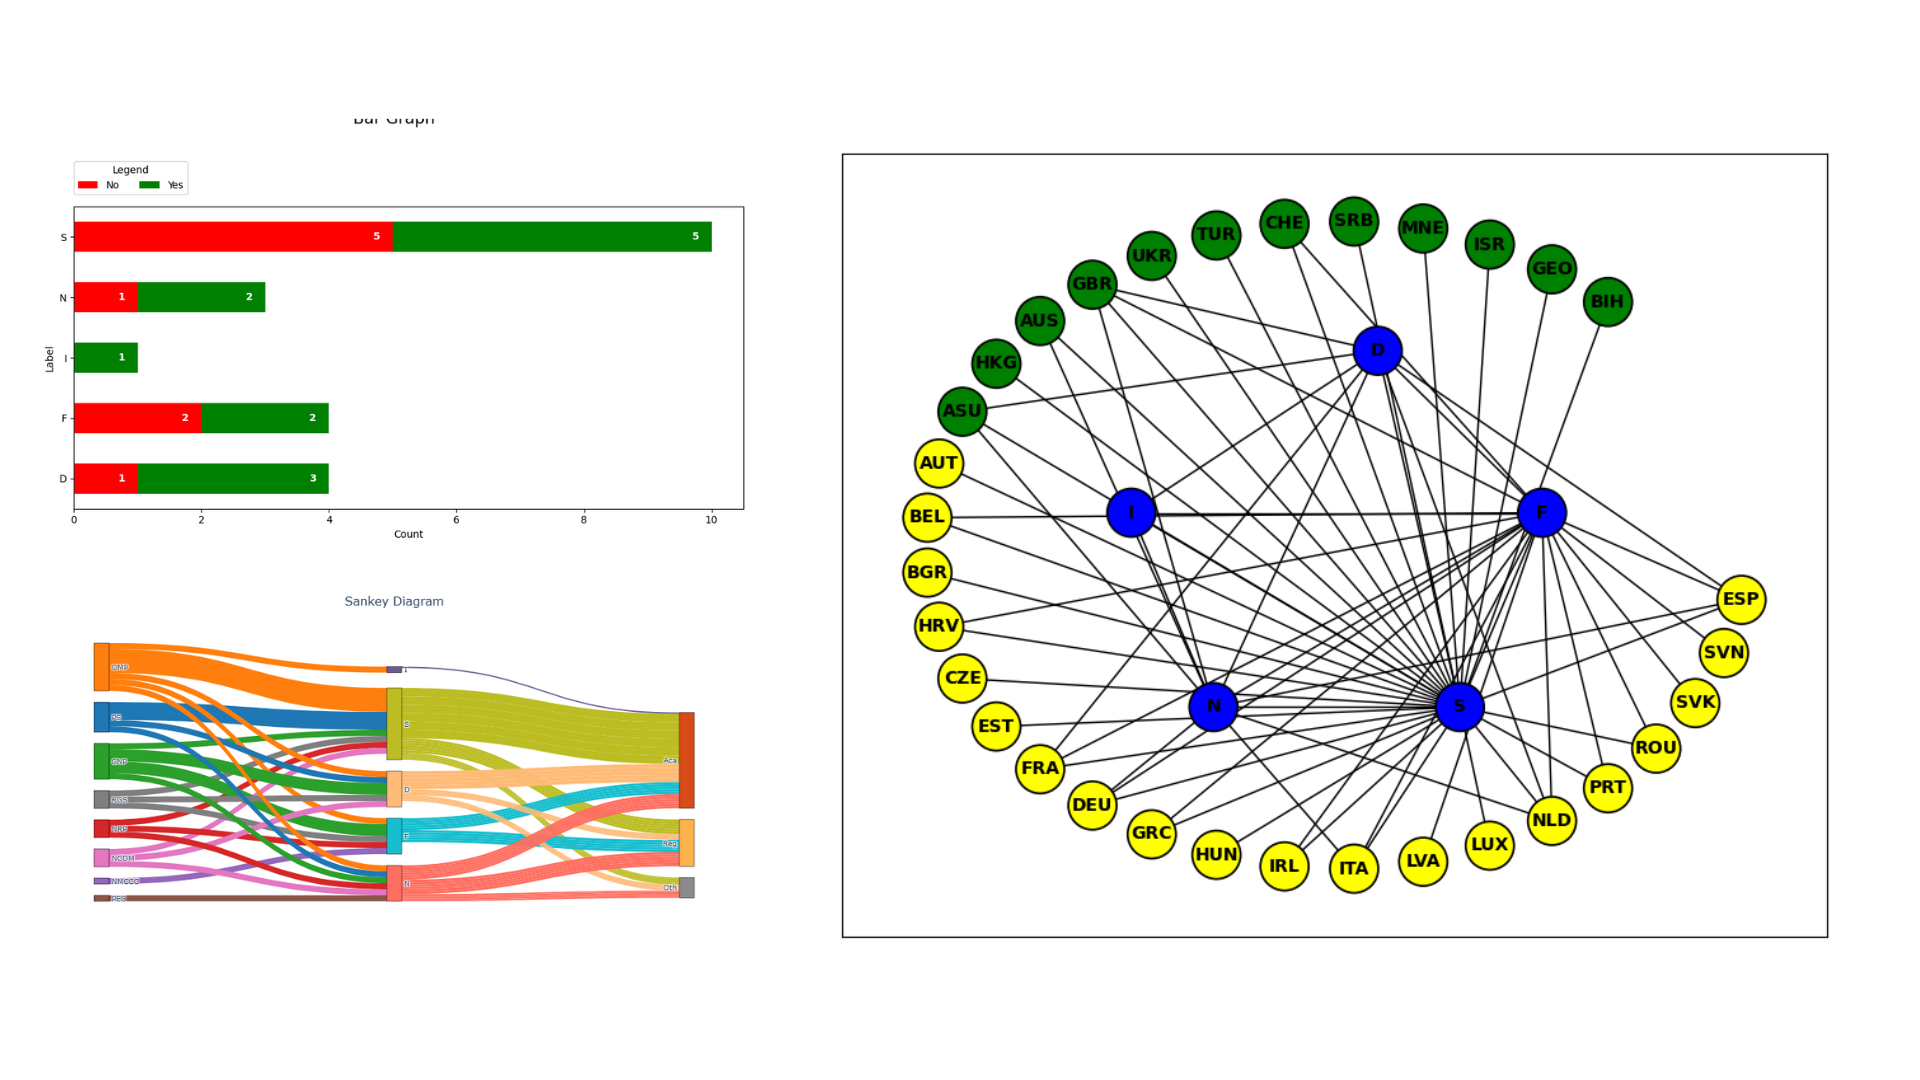

In [13]:
Image("./images/collated_graphs.png")